In [ ]:
# Перед нами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней.
# И таблица с характеристиками рекламных клиентов (тех, кто разместил эти объявления).

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [4]:
sns.set(font_scale=2, style="whitegrid", rc={'figure.figsize':(20,7)})

In [5]:
interactions_data = pd.read_csv('ads_data.csv')
clients_data      = pd.read_csv('ads_clients_data.csv')

In [9]:
interactions_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [8]:
clients_data

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [ ]:
# Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Округлим ответы до целых чисел.

In [7]:
merged_data = pd.merge(interactions_data, clients_data, on='client_union_id', how='left')


In [15]:
pivot_table = pd.pivot_table(merged_data, index='ad_id', columns='event', aggfunc='size', fill_value=0)


In [29]:
average_events = pivot_table.mean().round()

In [30]:
average_events

event
click    113.0
view     923.0
dtype: float64

In [31]:
pivot_table

event,click,view
ad_id,,
2,1,101
3,3,184
1902,1,41
2064,0,35
2132,1,58
...,...,...
122004,4,100
122013,0,156
122023,0,68


In [ ]:
# Посмотрим на распределение показов объявлений!
# По оси x – число показов
# По оси y – доля объявлений с такими показами
# Прологарифмируем число показов, а затем построем такой график, чтобы можно было понять форму распределения.

In [41]:
pivot_table['view_log'] = np.log(pivot_table['view'] + 1e-8)

In [42]:
pivot_table

event,click,view,view_log
ad_id,,,
2,1,101,4.615121
3,3,184,5.214936
1902,1,41,3.713572
2064,0,35,3.555348
2132,1,58,4.060443
...,...,...,...
122004,4,100,4.605170
122013,0,156,5.049856
122023,0,68,4.219508


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


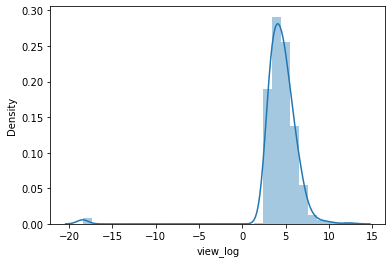

In [44]:
sns.distplot(pivot_table['view_log'], norm_hist=True, bins=30)

In [8]:
# Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления,
# у которых не было показов (обычное среднее).
# После этого посчитаем скользящее среднее по полученному результату с окном в 2 элемента.
# ВКакое значение скользящего среднего получим за 6 апреля 2019 года? Округлим ответ до целого числа.
merged_data.date_x = pd.to_datetime(merged_data.date_x)

In [121]:
merged_data.query('event == "view"') \
.groupby(['date_x', 'ad_id']) \
.agg({'event':'count'}) \
.groupby('date_x') \
.agg({'event':'mean'}) \
.rolling(2).mean()

,event
date_x,
2019-04-01,NaN
2019-04-02,146.134626
2019-04-03,150.869880
2019-04-04,419.927249
2019-04-05,797.505699
2019-04-06,598.116202


In [122]:
int(merged_data.query('event == "view"') \
    .groupby(['date_x', 'ad_id']) \
    .agg({'event':'count'}) \
    .groupby('date_x') \
    .agg({'event':'mean'}) \
    .rolling(2).mean().event[-1])

598

In [ ]:
# Посчитаем, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?
# Дни, в которых скользящее среднее равно NaN, не учитываем. Запишем ответ в формате yyyy-MM-dd

In [132]:
event_mean = merged_data.query('event == "view"') \
    .groupby(['date_x', 'ad_id']) \
    .agg({'event':'count'}) \
    .groupby('date_x') \
    .agg({'event':'mean'})
event_mean

,event
date_x,
2019-04-01,154.482270
2019-04-02,137.786982
2019-04-03,163.952778
2019-04-04,675.901720
2019-04-05,919.109677
2019-04-06,277.122727


In [133]:
rolling_mean = merged_data.query('event == "view"') \
    .groupby(['date_x', 'ad_id']) \
    .agg({'event':'count'}) \
    .groupby('date_x') \
    .agg({'event':'mean'}) \
    .rolling(2).mean()
rolling_mean

,event
date_x,
2019-04-01,NaN
2019-04-02,146.134626
2019-04-03,150.869880
2019-04-04,419.927249
2019-04-05,797.505699
2019-04-06,598.116202


In [147]:
big_difference = event_mean - rolling_mean
big_difference.abs().idxmax()

event   2019-04-06
dtype: datetime64[ns]

In [ ]:
# Объединим данные рекламы с данными о рекламных клиентах и найдем среднее количество дней
# от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [185]:
merged_data.dtypes

date_x                   datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
date_y                           object
community_id                      int64
create_date              datetime64[ns]
dtype: object

In [12]:
merged_data['create_date'] = pd.to_datetime(merged_data['create_date'])

In [13]:
first_ad_date_per_client = merged_data.groupby('client_union_id')['date_x'].min()

In [14]:
merged_data['days_between_create_and_first_ad'] = (merged_data['date_x'] - merged_data['create_date']).dt.days

In [15]:
average_days_between_create_and_first_ad = merged_data.groupby('client_union_id')['days_between_create_and_first_ad'].mean()

In [16]:
average_days_between_create_and_first_ad.mean()

124.65203153268644

In [17]:
# Вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.
# Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов.
# Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу
# Ответ дадим в процентах и округлим до сотых. 

In [18]:
clients_within_365_days = merged_data[merged_data['days_between_create_and_first_ad'] <= 365]

In [19]:
clients_launched_ads_within_365_days = clients_within_365_days['client_union_id'].nunique()

In [20]:
conversion_rate = (clients_launched_ads_within_365_days / clients_data['client_union_id'].nunique()) * 100

In [21]:
round(conversion_rate,2)

0.69

In [22]:
# Разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.
# Определим, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).

In [23]:
time_intervals = [0, 30, 90, 180, 365]

In [24]:
merged_data['time_interval'] = pd.cut(merged_data['days_between_create_and_first_ad'], time_intervals)

In [25]:
clients_launched_first_month = merged_data[merged_data['time_interval'] == pd.Interval(left=0, right=30)]

In [26]:
clients_launched_first_month['client_union_id'].nunique()

11

In [27]:
# Построем интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них
# Расположим их так, чтобы внизу была самая малочисленная, а наверху – самая большая.

In [28]:
clients_launched_ = merged_data.groupby('time_interval').agg({'client_union_id':'nunique'}).sort_values('client_union_id', ascending= False)
clients_launched_

C:\Users\pchpp\AppData\Local\Temp\ipykernel_12712\2722311553.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clients_launched_ = merged_data.groupby('time_interval').agg({'client_union_id':'nunique'}).sort_values('client_union_id', ascending= False)


,client_union_id
time_interval,
"(90, 180]",399
"(30, 90]",265
"(180, 365]",169
"(0, 30]",11


In [41]:
interval_counts.index = clients_launched_.index.astype(str)

In [46]:
interval_counts = clients_launched_.sort_values('client_union_id', ascending=False).reset_index()

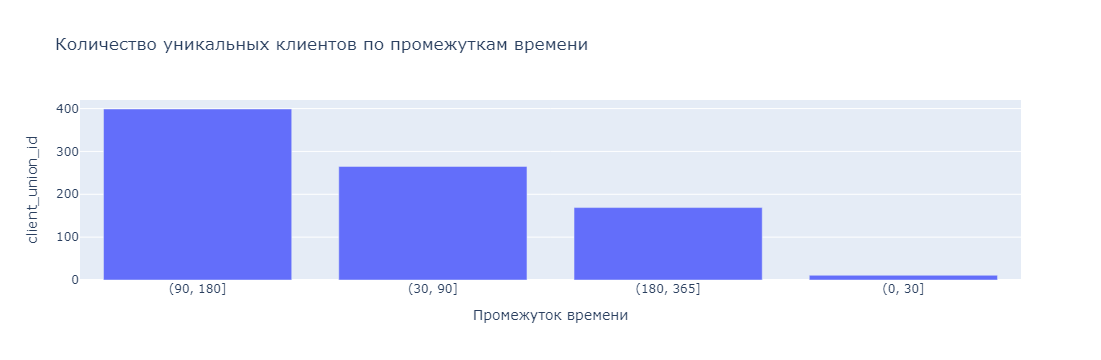

In [45]:
fig = px.bar(interval_counts, x ='time_interval', y = 'client_union_id',
             labels={'time_interval': 'Промежуток времени', 'unique_users': 'Количество уникальных клиентов'},
             title='Количество уникальных клиентов по промежуткам времени')
fig.show()

In [ ]:
# Какое значение атрибута Parent самое частое?

In [346]:
dff = pd.read_csv('gff.tsv', sep='\t')

In [354]:
dff

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1
...,...,...,...,...,...,...,...,...,...
507,chr17,RefSeq,exon,6812219,6818159,.,+,.,Parent=XM_001475631.1
508,chr17,RefSeq,protein,6806527,6812289,.,+,.,ID=;Parent=XM_001475631.1
509,chr17,RefSeq,CDS,6806527,6806553,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
510,chr17,RefSeq,exon,6811792,6811869,.,+,.,Parent=XM_001475631.1


In [358]:
dff['attributes'].str.extract(r'Parent=([^;]+)').value_counts().idxmax()

('XM_001475631.1',)

In [ ]:
# Какое самое частое значение в колонке type?

In [361]:
dff.type.value_counts().idxmax()

'exon'